# Copyright Netherlands eScience Center <br>
** Function     : Compare OMET at 60N in the Atlantic and the Pacific from ORAS4 ** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2018.12.27 ** <br>
** Last Update  : 2018.12.27 ** <br>
Description     : The script aims to show the OMET at 60N in the Atlantic and the Pacific. We use ORAS4 as an instance. This is for the revision of paper about the AMET and OMET.<br>

Return Values   : png <br>
Dependencies    : os, time, numpy, netCDF4, sys, matplotlib <br>
variables       : OMET <br>
Caveat          : <br>

In [2]:
%matplotlib inline

import sys
sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import numpy as np
import scipy
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import os
import meta.statistics
import meta.visualizer

In [6]:
if __name__=="__main__":
    # sample
    ################################   Input zone  ######################################
    # specify data path
    datapath = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/warehouse_met'
    datapath_ORAS4_fields = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ORAS4/regression'
    datapath_ORAS4_mask = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ORAS4'
    output_path = '/home/ESLT0068/NLeSC/PhD/Paperwork/Article/AMET_OMET/figures/revision'
    #####################################################################################
    print ('*********************** extract variables *************************')
    dataset_ORAS4_OMET = Dataset(os.path.join(datapath,
                                 'oras_model_monthly_1958_2017_omet.nc'))
    dataset_ORAS4_mask = Dataset(os.path.join(datapath_ORAS4_mask, 'mesh_mask.nc'))
    # extract time series from 1979 to 2016
    # 3D fields [year, month, lat]
    OMET_int_ORAS4 = dataset_ORAS4_OMET.variables['E_int'][21:-1,:,180:]/1000 # from Tera Watt to Peta Watt # start from 1979
    OMET_atl_int_ORAS4 = dataset_ORAS4_OMET.variables['E_atl_int'][21:-1,:,180:]/1000
    OMET_pac_int_ORAS4 = dataset_ORAS4_OMET.variables['E_pac_int'][21:-1,:,180:]/1000  
    # other dimensions
    year_ORAS4 = dataset_ORAS4_OMET.variables['year'][21:-1]    # from 1979 to 2016
    latitude_OMET_ORAS4 = dataset_ORAS4_OMET.variables['latitude_aux'][180:]
    gphiv_OMET_ORAS4 = dataset_ORAS4_OMET.variables['gphiv'][180:,:]
    glamv_OMET_ORAS4 = dataset_ORAS4_OMET.variables['glamv'][180:,:]
    mask_ORAS4 = dataset_ORAS4_mask.variables['vmask'][0,0,180:,:]

*********************** extract variables *************************


In [8]:
    print (latitude_OMET_ORAS4[53])
    OMET_pac_int_ORAS4_series = OMET_pac_int_ORAS4.reshape(len(year_ORAS4)*12, len(latitude_OMET_ORAS4))
    OMET_atl_int_ORAS4_series = OMET_atl_int_ORAS4.reshape(len(year_ORAS4)*12, len(latitude_OMET_ORAS4))

60.018433


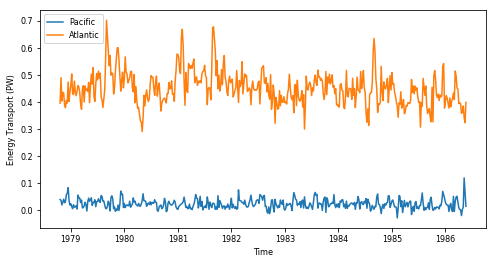

In [12]:
    index_1979 = np.arange(1,457,1)
    index_year_1979 = np.arange(1979,2015,1)
    fig = plt.figure(figsize=(8,4))
    plt.plot(index_1979,OMET_pac_int_ORAS4_series[:,53],label='Pacific')
    plt.plot(index_1979,OMET_atl_int_ORAS4_series[:,53],label='Atlantic')
    plt.xlabel("Time",fontsize=8)
    plt.xticks(np.arange(13,len(year_ORAS4)*12+12+1,60),index_year_1979,fontsize=8)
    plt.ylabel("Energy Transport (PW)",fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(frameon=True, loc=2, prop={'size': 8})
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    plt.show()
    fig.savefig(os.path.join(output_path,'OMET_Pac_Atl_ORAS4.png'),dpi=300)
    plt.close(fig)